#Tarea metodos computacionales

Fecha de entrega: Viernes 18 de Octubre







# 1. Movimiento de proyectiles en presencia de viento.

Supongamos que un proyectil es lanzado desde el origen con una rapidez $v=vo( \cos \theta , \sin \theta) $. Supongamos además que el efecto del viento sobre el proyectil es el de una fuerza proporcional a la velocidad relativa entre el viento y el proyectil. Teniendo presente que si $u$ es la velocidad del viento y $\alpha$ el ángulo que hace dirección de esta velocidad con el eje x, se puede entrontrar las siguientes ecuaciones diferenciales, asociada al estado de movimiento del [proyectil](https://iopscience.iop.org/article/10.1088/0143-0807/36/2/025016/meta):


\begin{equation}
m\frac{dv_x}{dt} = -mb(v_x-u\cos \alpha )
\end{equation}

\begin{equation}
m\frac{dv_y}{dt} = -mg-mb(v_x-u\sin \alpha ),
\end{equation}

donde b es el párametro de rozamiento. La soluciones a las ecuaciones anteriores vienen dadas por:

Posición en x
\begin{equation}
x=(u\cos \alpha) t + \frac{1}{b} (v_0\cos \theta_0 -u \cos\alpha)(1-\mathrm{exp}(-bt))
\end{equation}

Posicion en y 
\begin{equation}
y= \frac{1}{b}\left(\frac{g}{b}+v_0 \sin \theta_0 -u\sin\alpha \right)(1-\mathrm{exp}(-bt))-\left( \frac{g}{b}-u\sin\alpha\right)t
\end{equation}

Ver imagen:  http://www.sc.ehu.es/sbweb/fisica3/fluidos/viento/parabolico.html


0. Establezca las siguietnes condiciones inciales.

```
#Parametros iniciales

v0 = 60 #Velocidad en m/s
alpha = np.pi #Angulo del viento
theta = np.deg2rad(45) #Angulo de lanzamiento
u = v0/2             #rapidez del viento
b = 0.05             #Parametro de friccion 
g = 9.8                #Aceleracion de la gravedad m/s2

Params = (alpha, v0, b, u,g)  #Parametros en tupla.

```



1. Defina dos funciones, una para x y otra para y. 

```

#Posicion en x
def pos_x(t, theta, alpha, v0, b, u,g):
  x = #escriba aca la expresión
  return x

#Posicion en y
def pos_y(t, theta, alpha, v0, b, u,g):


  y = #escriba aca la expresión
  return y 

```

2. Construya un diccionario con las claves "X", "Y", "Tiempo"

3. Con el diccionario construya un data frame de pandas llamado df con los nombres de columnas "X", "Y", "Tiempo"  https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.from_dict.html. Defina 1000 registros para el intervalo de tiempo elegido.


4. Realice un gráfico de x como función del tiempo, de y como función del tiempo y la trayectoria de la partícula (df["X"], df["tiempo"], df["Y"]).


5. Determine el alcance máximo de la partícula, para ello tome  la solucion teórica con $y=0$, solucione numéricamente la ecuación para t y remplace este valor en la ecuación para x. Resuelvalo para $\theta=45^{o}$.  

6. Construya una  grafica del alcance máximo R como función de $\theta$, varie $\theta$  entre 10 y 90 grados cada 5 grados.

7. Realice una interpolacion de R como función de theta.









In [189]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize
from scipy import interpolate
import sympy as sym
import math

0.

In [310]:
#Parametros iniciales

v0 = 60 #Velocidad en m/s
alpha = np.pi #Angulo del viento
theta = np.deg2rad(45) #Angulo de lanzamiento
u = v0/2             #rapidez del viento
b = 0.05             #Parametro de friccion 
g = 9.8                #Aceleracion de la gravedad m/s2

params = (alpha, v0, b, u,g)  #Parametros en tupla.

1.

In [311]:
#Posicion en x
def pos_x(t, theta, alpha, v0, b, u,g):
    T1 = u*np.cos(alpha)*t
    T2 = (1/b)*(v0*np.cos(theta)-u*np.cos(alpha))
    T3 = 1-np.exp(-b*t)
    return T1+T2*T3

#Posicion en y
def pos_y(t, theta, alpha, v0, b, u,g):
    T1 = (1/b)*(g/b+v0*np.sin(theta)-u*np.sin(alpha))
    T2 = 1-np.exp(-b*t)
    T3 = (g/b-u*np.sin(alpha))*t
    return T1*T2-T3

2.

In [312]:
# Diccionario con los valores de x, y, t
time=np.linspace(0,20,1000)
dic = {'X':pos_x(time,theta,*params),'Y':pos_y(time,theta,*params),'Tiempo':time}

3.

In [313]:
# DataFrame contruido con el diccionario
df=pd.DataFrame(dic)
df

,X,Y,Tiempo
0,0.000000,0.000000,0.00000
1,0.848652,0.846989,0.02002
2,1.695854,1.689205,0.04004
3,2.541608,2.526653,0.06006
4,3.385914,3.359336,0.08008
...,...,...,...
995,315.908872,-897.057712,19.91992
996,315.843561,-899.219473,19.93994
997,315.777714,-901.382998,19.95996
998,315.711332,-903.548284,19.97998


4.

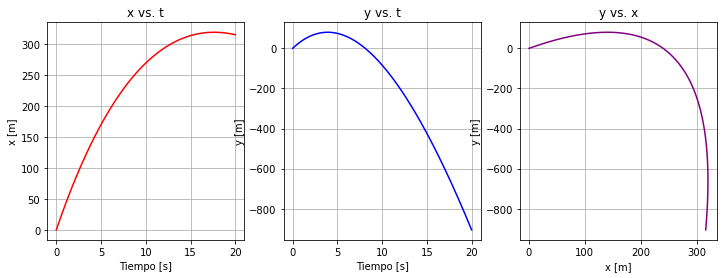

In [314]:
plt.figure(figsize=(12,4))

# Gráfico de la posición en x respecto al tiempo
plt.subplot(131)
plt.plot(df.Tiempo,df.X,'r-')
plt.xlabel('Tiempo [s]')
plt.ylabel('x [m]')
plt.title('x vs. t')
plt.grid()

# Gráfico de la posición en y respecto al tiempo
plt.subplot(132)
plt.plot(df.Tiempo,df.Y,'b-')
plt.xlabel('Tiempo [s]')
plt.ylabel('y [m]')
plt.title('y vs. t')
plt.grid()

# Gráfico de la posición en y respecto a la posición en x
plt.subplot(133)
plt.plot(df.X,df.Y,'purple')
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.title('y vs. x')
plt.grid()
plt.show()

5.

In [315]:
# Optimización de la posición en y para encontrar el tiempo de vuelo
tmax = optimize.newton(lambda t:pos_y(t,theta,*params),5)
Rmax = pos_x(tmax,theta,*params)   # Alcance máximo calculado con el tiempo de vuelo
print(f'Alcance máximo: {Rmax} m')

Alcance máximo: 239.60614945520686 m


6.

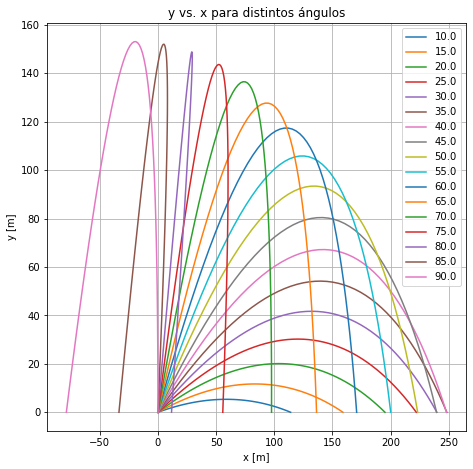

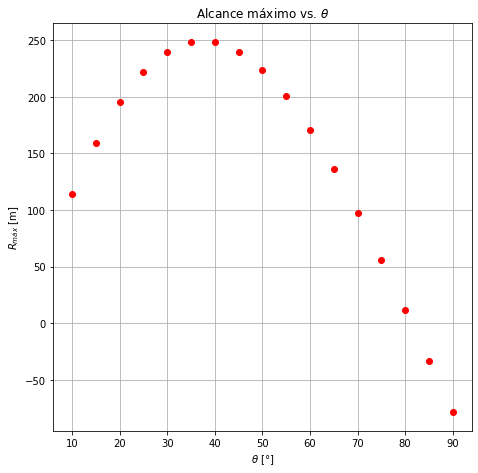

In [316]:
# Cálculo del alcance máximo para distintos ángulos
Theta = np.deg2rad(np.arange(10,95,5))
R = np.zeros(len(Theta))
for i in range(len(Theta)):
    T=optimize.newton(lambda t:pos_y(t,Theta[i],*params),10)
    R[i]=pos_x(T,Theta[i],*params)

# Gráfico de las trayectorias dado un ángulo
plt.figure(figsize=(7.5,7.5))
for theta in Theta:
    T=optimize.newton(lambda t:pos_y(t,theta,*params),10)
    tiempo=np.linspace(0,T)
    plt.plot(pos_x(tiempo,theta,*params),pos_y(tiempo,theta,*params),label=f'{round(np.rad2deg(theta),0)}')
plt.grid()
plt.legend()
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.title('y vs. x para distintos ángulos')
plt.show()

# Gráfico del alcance máximo en función del ángulo
plt.figure(figsize=(7.5,7.5))
plt.plot(np.rad2deg(Theta),R,'ro')
plt.xlabel(r'$\theta$ [°]')
plt.ylabel(r'$R_{máx}$ [m]')
plt.title(r'Alcance máximo vs. $\theta$')
plt.grid()
plt.show()
    

7.

In [319]:
# Polinomio de interpolación del alcance máximo en función del ángulo (en grados)
pol=interpolate.lagrange(np.rad2deg(Theta),R)
x=sym.symbols('θ')
sym.expand(pol(x))

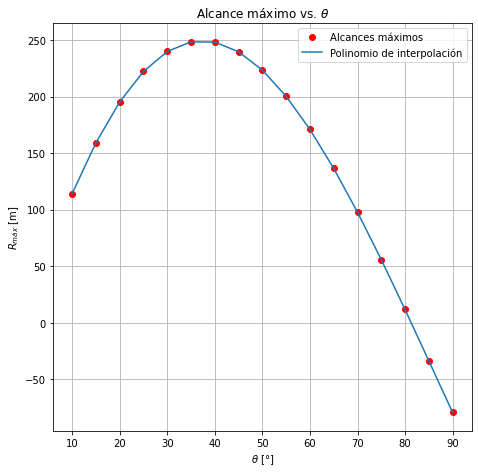

In [320]:
# Gráfica del polinomio de interpolación
plt.figure(figsize=(7.5,7.5))
plt.plot(np.rad2deg(Theta),R,'ro',label='Alcances máximos')
plt.plot(np.rad2deg(Theta),pol(np.rad2deg(Theta)),label='Polinomio de interpolación')
plt.xlabel(r'$\theta$ [°]')
plt.ylabel(r'$R_{máx}$ [m]')
plt.title(r'Alcance máximo vs. $\theta$')
plt.legend()
plt.grid()
plt.show()




# 2.0  Interpolación lagrange

Consideremos la función: 
\begin{equation*}
     f(x) = \frac{1}{1+25x^2}
\end{equation*}
en el intervalo $[-1, 1]$, definamos un conjunto de puntos $n+1$  equiespaciados en $[-1,1]$.

 1. Representar gráficamente la función junto al polinomio de interpolación de Lagrange, $p_n(x)$, para $n=\{ 4, 8, 12, 16, 20 \}$. 
 2. Comprobar gráficamente cómo el error aumenta con $n$. Emplee la libreria, simbolica de sympy y encuente el error en la interpolación.
 
 Para este numeral, emplee que: 
 
 
La cota del  error , viene dado por: 
\begin{equation}
f(x) - P(x) = \epsilon = \frac{1}{(n+1)!} f^{(n+1)}(\xi)(x - x_0)(x - x_1) ... (x - x_n)
\end{equation}, emplee la libreria simbolica para realizar la estimación de dicha cuota, sólo para n = 4, en el punto 0.5

-50*x/(25*x**2 + 1)**2
-50*x/(25*x**2 + 1)**2
50*(100*x**2/(25*x**2 + 1) - 1)/(25*x**2 + 1)**2
15000*x*(-50*x**2/(25*x**2 + 1) + 1)/(25*x**2 + 1)**3
15000*(10000*x**4/(25*x**2 + 1)**2 - 300*x**2/(25*x**2 + 1) + 1)/(25*x**2 + 1)**3
3750000*x*(-10000*x**4/(25*x**2 + 1)**2 + 400*x**2/(25*x**2 + 1) - 3)/(25*x**2 + 1)**4


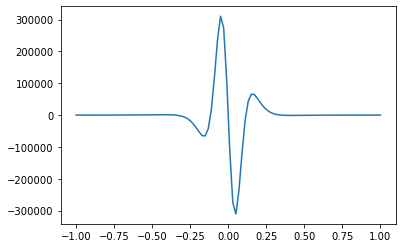

In [162]:
#Ayuda: 


f_s = lambda x: 1/(1+25*x**2)
sym.init_printing() # Usar LaTeX para dibujar ecuaciones

x = sym.symbols("x") # x será una variable simbólica
f_s(x)
print(sym.diff(f_s(x),x))
print(sym.diff(f_s(x),x, 1))
print(sym.diff(f_s(x),x, 2))
print(sym.diff(f_s(x),x, 3))
print(sym.diff(f_s(x),x, 4))
print(sym.diff(f_s(x),x, 5))
f5 = sym.diff(f_s(x),x, 5)
fxn5 = sym.lambdify(x,f5,'numpy') #numpy funcion

x_ = np.linspace(-1, 1, 100)

plt.figure()
plt.plot(x_, fxn5(x_) )
plt.show()

1.

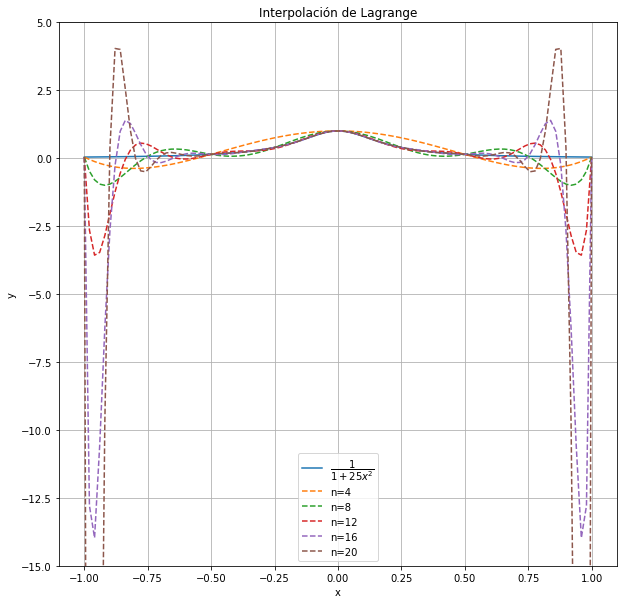

In [322]:
X=np.linspace(-1,1,100)

# Gráfica de la función y sus polinomios de interpolación de Lagrange de grado {4,8,12,16,20}
plt.figure(figsize=(10,10))
plt.plot(X,f_s(X),label=r'$\dfrac{1}{1+25x^2}$')
for n in range(1,6):
    Int=np.linspace(-1,1,4*n+1)
    y=interpolate.lagrange(Int,f_s(Int))
    plt.plot(X,y(X),label=f'n={4*n}',linestyle='--')
plt.title('Interpolación de Lagrange')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(-15,5)
plt.grid()
plt.show()

2.

In [190]:
def eps(x,f,n,a,b,ξ):
    '''
    Calcula el error en el polinomio de interpolación de Lagrange de grado n.
    --------------
    x: variable
    f: función que se está interpolando
    n: grado del polinomio de Lagrange
    a,b: límites del intervalo
    ξ: punto en el cual se evalúa la (n+1)-ésima derivada (debe estar entre a y b
    '''
    sym.init_printing()
    X=sym.symbols('x')
    f(X)
    fn1=sym.diff(f(X),X, n+1)
    fxn1=sym.lambdify(X,fn1,'numpy')
    F=fxn1(ξ)/math.factorial(n+1)
    
    Int=np.linspace(a,b,n+1)
    for xi in Int:
        F *= (x-xi)
    return F

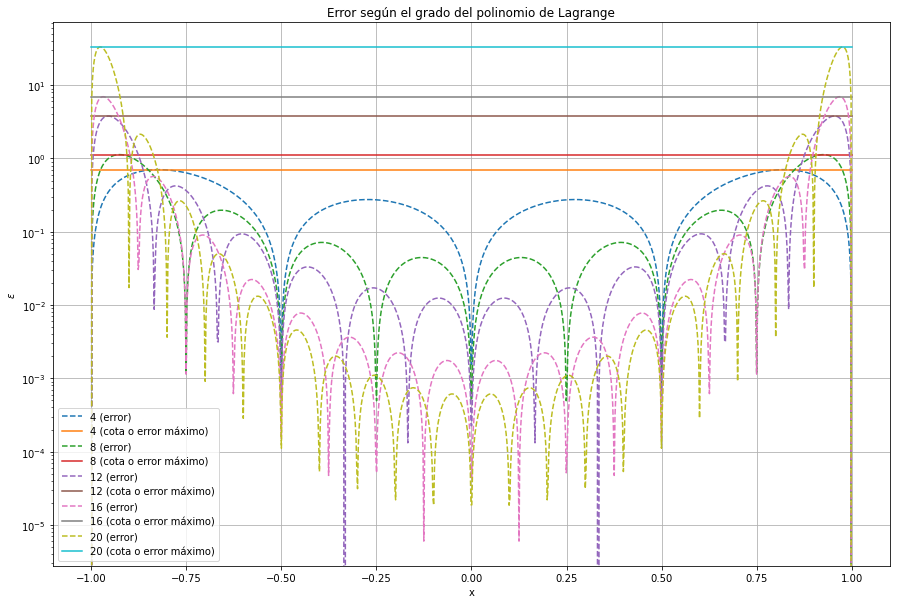

In [323]:
# Gráfica del error en el polinomio y su respectiva cota, según la fórmula presentada
plt.figure(figsize=(15,10))
for n in range(1,6):
    X=np.linspace(-1,1,1000)
    y=eps(X,f_s,4*n,-1,1,0.5)
    plt.semilogy(X,np.abs(y),label=f'{4*n} (error)',linestyle='--')   # Se escogió escala semilog por el tamaño de los datos
    maxerr=np.abs(y).max()
    y2=np.full(len(X),maxerr)
    plt.plot(X,y2,label=f'{4*n} (cota o error máximo)')
plt.title('Error según el grado del polinomio de Lagrange')
plt.xlabel('x')
plt.ylabel(r'$\epsilon$')
plt.legend()
plt.grid()
plt.show()

En la gráfica se puede observar que, para $\xi=0.5$, el error máximo, es decir, la cota del error, crece conforme crece n.


#3.  Interpolación Hermite

Consideremos la función: 
\begin{equation*}
     f(x) = \frac{1}{1+25x^2}
\end{equation*}
en el intervalo $[-1, 1]$, definamos un conjunto de puntos $n+1$  equiespaciados en $[-1,1]$.

 1. Representar gráficamente la función junto al polinomio de interpolación de Lagrange, $p_n(x)$, para $n=\{ 4, 8, 12, 16, 20 \}$. 
 2. Comprobar gráficamente cómo el error aumenta con $n$. Emplee la libreria, simbolica de sympy y encuente el error en la interpolación.
 
 Para este numeral, emplee que: 
 
 
La cota del  error , viene dado por: 

$$
  f(x)-p_{2n+1}(x)
  = \frac{f^{2n+2}(\xi)}{(2n+2)!} (x-x_0)^2(x-x_1)^2(x-x_2)^2,
$$





emplee la libreria simbolica para realizar la estimación de dicha cuota, sólo para n = 4, en el punto 0.5


1.

C:\Users\Santiago\anaconda3\lib\site-packages\numpy\polynomial\hermite.py:1403: RankWarning: The fit may be poorly conditioned
  return pu._fit(hermvander, x, y, deg, rcond, full, w)


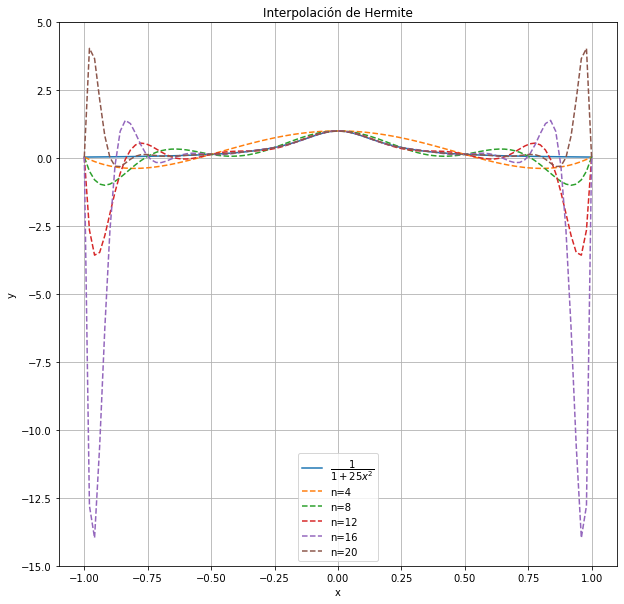

In [324]:
X=np.linspace(-1,1,100)

# Gráfica de la función y sus polinomios de interpolación de Hermite de grado {4,8,12,16,20}
plt.figure(figsize=(10,10))
plt.plot(X,f_s(X),label=r'$\dfrac{1}{1+25x^2}$')
for n in range(1,6):
    Int=np.linspace(-1,1,4*n+1)
    y=np.polynomial.hermite.Hermite.fit(Int,f_s(Int),4*n)
    plt.plot(X,y(X),label=f'n={4*n}',linestyle='--')
plt.title('Interpolación de Hermite')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.ylim(-15,5)
plt.grid()
plt.show()

2.

In [325]:
def epsH(x,f,n,a,b,ξ):
    '''
    Calcula el error en el polinomio de interpolación de Hermite de grado n.
    --------------
    x: variable
    f: función que se está interpolando
    n: grado del polinomio de Lagrange
    a,b: límites del intervalo
    ξ: punto en el cual se evalúa la 2(n+1)-ésima derivada (debe estar entre a y b
    '''
    sym.init_printing()
    X=sym.symbols('x')
    f(X)
    fn1=sym.diff(f(X),X, 2*(n+1))
    fxn1=sym.lambdify(X,fn1,'numpy')
    F=fxn1(ξ)/math.factorial(2*(n+1))
    
    Int=np.linspace(a,b,n+1)
    for xi in Int:
        F *= (x-xi)**2
    return F

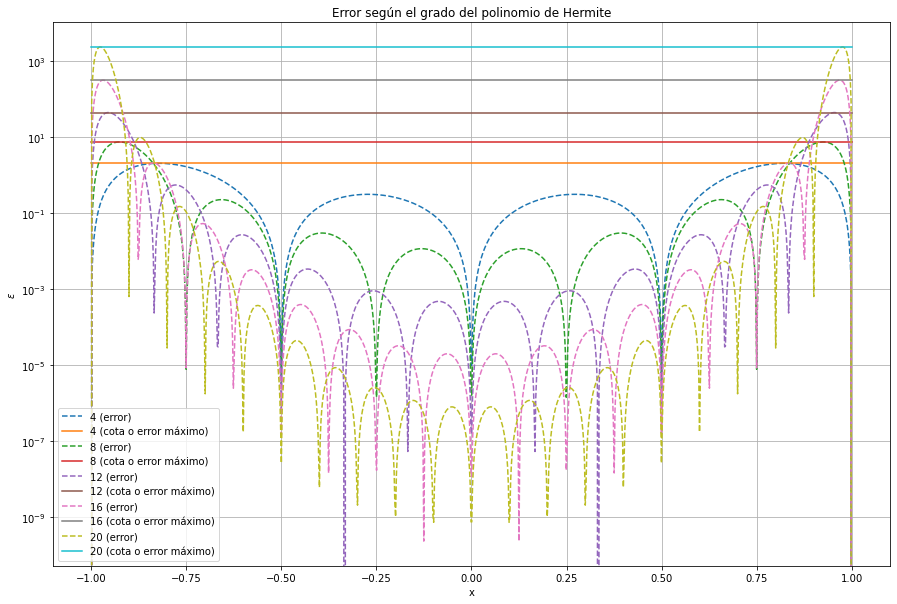

In [326]:
# Gráfica del error en el polinomio y su respectiva cota, según la fórmula presentada
plt.figure(figsize=(15,10))
for n in range(1,6):
    X=np.linspace(-1,1,1000)
    y=epsH(X,f_s,4*n,-1,1,0.5)
    plt.semilogy(X,np.abs(y),label=f'{4*n} (error)',linestyle='--')   # Se escogió escala semilog por el tamaño de los datos
    maxerr=np.abs(y).max()
    y2=np.full(len(X),maxerr)
    plt.plot(X,y2,label=f'{4*n} (cota o error máximo)')
plt.title('Error según el grado del polinomio de Hermite')
plt.xlabel('x')
plt.ylabel(r'$\epsilon$')
plt.legend()
plt.grid()
plt.show()

# 4. Spline Cúbico

Consideremos la imagen ![paloma](https://github.com/hernansalinas/Metodos_Computacionales_taller/blob/main/Asignaciones/Tareas/Enunciados_2021_02/figuras/Fig.png?raw=true).

Con los datos dados en la tabla:

1. Representar gráficamente la imagen, usando las órdenes `imread` e `imshow` de python (estas órdenes están contenidas en el paquete `matplotlib`) 

2. Definir una lista de puntos, $x_i$,$y_i$ de la paloma.

3. Representar el polinomio de interpolación de Lagrange en estos puntos, para aproximar el dibujo.

4. Repetir el proceso de interpolación mediante *splines* cúbicos. Para ello, utilizar la función `CubicSpline` (contenida en `scipy.interpolate`), 


5. Comparar los resultados. ¿Alguna de las interpolaciones presenta oscilaciones? ¿A qué se debe este fenómeno?

Ref: Metodos numericos, Burden.

1.

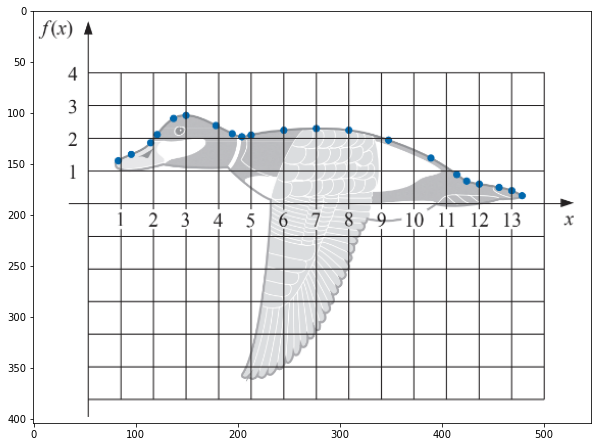

In [327]:
# Imagen
plt.figure(figsize=(10,10))
im=plt.imread('C:/Users/Santiago/OneDrive - Universidad de Antioquia/Universidad de Antioquia/Métodos Computacionales/Pato.png')
plt.imshow(im)
plt.show()

2.

In [328]:
# DataFrame con los pixeles
x=[82,96,115,120,137,150,179,195,204,213,245,277,309,348,389,415,425,437,456,469,479]
y=[147,141,129,122,105,102,113,120,123,122,117,116,116,127,144,160,167,170,173,177,181]

df=pd.DataFrame({'x':x,'y':y})
df

,x,y
0,82,147
1,96,141
2,115,129
3,120,122
4,137,105
5,150,102
6,179,113
7,195,120
8,204,123
9,213,122


3.

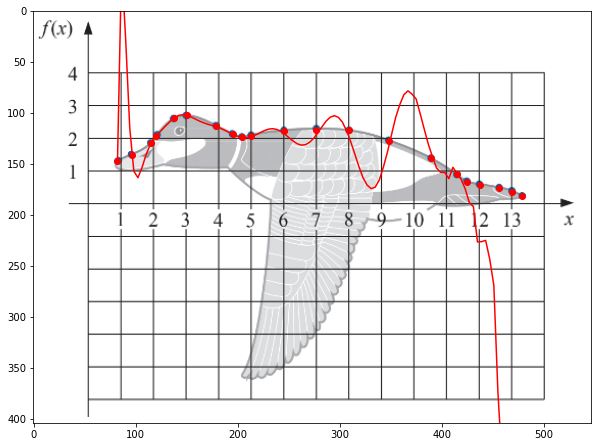

In [331]:
# Interpolación de Lagrange
poly=interpolate.lagrange(df.x,df.y)
X1=np.linspace(df.x[0],df.x[20],100)

# Gráfica del polinomio de Lagrange y los puntos
plt.figure(figsize=(10,10))
im=plt.imread('C:/Users/Santiago/OneDrive - Universidad de Antioquia/Universidad de Antioquia/Métodos Computacionales/Pato.png')
plt.plot(df.x,df.y,'ro')
plt.plot(X1,poly(X1),'r')
plt.imshow(im)
plt.show()

4.

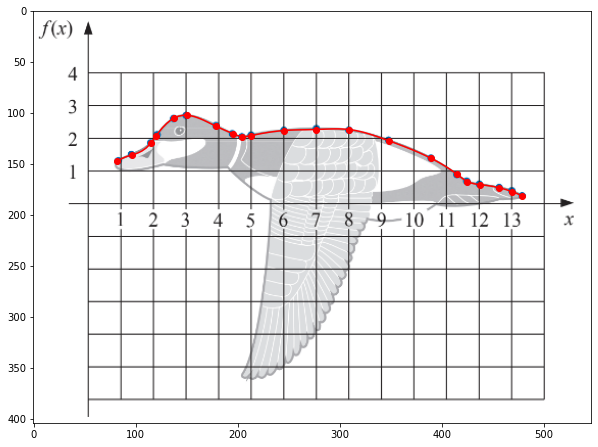

In [330]:
# Interpolación por CubicSpline
poly1=interpolate.CubicSpline(df.x,df.y)
X1=np.linspace(df.x[0],df.x[20],100)

# Gráfica del CubicSpline y los puntos
plt.figure(figsize=(10,10))
im=plt.imread('C:/Users/Santiago/OneDrive - Universidad de Antioquia/Universidad de Antioquia/Métodos Computacionales/Pato.png')
plt.plot(df.x,df.y,'ro')
plt.plot(X1,poly1(X1),'r')
plt.imshow(im)
plt.show()

5. A diferencia de la interpolación de Lagrange, el Cubic Spline no presenta oscilaciones, esto porque entre cada par de puntos interpola con un polinomio cúbico, que garantiza que sea, no solo continuamente diferenciable, sino que su segunda derivada sea continua también, con lo cual la interpolación es lo suficientemente suave. El polinomio de Lagrange, por otro lado, solo garantiza que en coincida en cada punto, con lo que es posible que presente oscilaciones en algunas partes, perdiendo así precisión.